#Image and voice processing
######This notebook was created by Abrar Ghandurah

---
resoruces that helped to understand more about images:
* GeeksforGeeks Website
* Machine Learning for dummies book
* [learnpython webite]('https://commons.wikimedia.org/wiki/Main_Page#/media/File:Man_talking_on_the_phone_in_Montr%C3%A9al-Pierre_Elliott_Trudeau_International_Airport_006.jpg')
*[Tutorialspoint website]('https://www.tutorialspoint.com/plotting-various-sounds-on-graphs-using-python-and-matplotlib')

### Image Processing
---
Tasks for today:

* Image rotation

In [ ]:
#To get started with image rotation we need to know more about it
#Images can rotate to any degreee , so we need to define a rotation matrix listing the rotation point
#----------------------------------------------------------------

#import libraries
import cv2 #this is computer vision lib which will help in image processing
import matplotlib.pyplot as plt #to plot

#Reading the image as an input
img = cv2.imread("ImageProcessing.png")
print(img)#getting the matrix of the image

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 253 253]
  [255 255 255]
  [255 255 255]]]


In [ ]:
#Next step for the rotation is converting it from BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
# Image rotation parameter
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 30
scale = 1

In [ ]:
# getRotationMatrix2D creates a matrix needed for transformation.
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

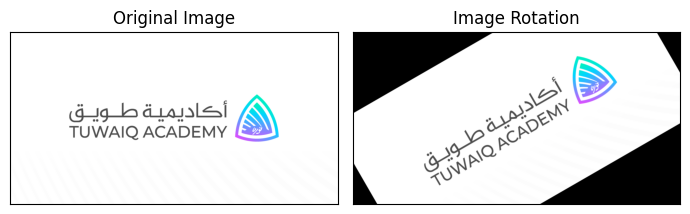

In [ ]:

# We want matrix for rotation w.r.t center to 30 degree without scaling.
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Rotated image
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()

#Using the book for image noise removing

<function matplotlib.pyplot.show(close=None, block=None)>

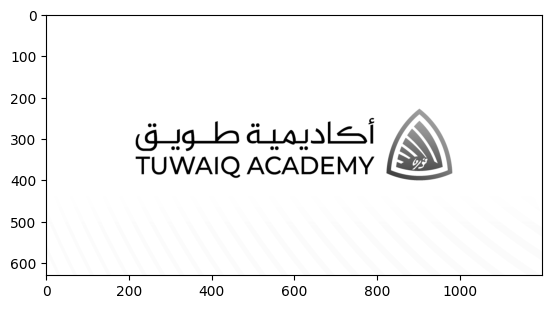

In [ ]:
#working with a set of images (refrence Machine learining book for dummies)
#Working with a picture as an unstrcutured file
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

example_file=("ImageProcessing.png")

image=imread(example_file,as_gray=True)
plt.imshow(image,cmap=cm.gray)
plt.show

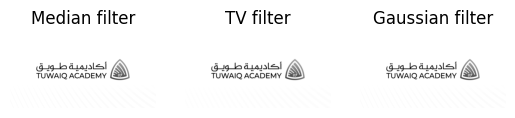

In [ ]:
#Sometimes images aren't perfect , they can present noise or other granularity
#you can smooth the images using filters
from skimage import filters,restoration, util
from skimage.morphology import disk
conv_image = util.img_as_ubyte(image)

#using median filter
median_filter=filters.rank.median(conv_image,disk(1))

#using tv filter
tv_filter= restoration.denoise_tv_chambolle(conv_image,weight=0.1)

#using gaussian filter
gaussian_filter = filters.gaussian(conv_image,sigma=0.7)

fig = plt.figure()
for k,(t,F) in enumerate((('Median filter',median_filter),
                          ('TV filter',tv_filter)
                          ,('Gaussian filter',gaussian_filter))):
  f=fig.add_subplot(1,3,k+1)
  plt.axis('off')
  f.set_title(t)
  plt.imshow(F,cmap=cm.gray)
plt.show()

#Visualizing Sounds

In [ ]:
#first we start by opening a wav file
#----------------------------------------
#importing module and libraries
import wave ,sys
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Loading the audio file
obj = wave.open('/content/applause_y.wav','rb')

In [ ]:
#reading all the frames
signal = obj.readframes(-1)
signal = np.frombuffer(signal,dtype='int16')

In [ ]:
#getting the frame rate
f_rate= obj.getframerate()

In [ ]:
time=np.linspace(0,len(signal)/f_rate,num=len(signal))

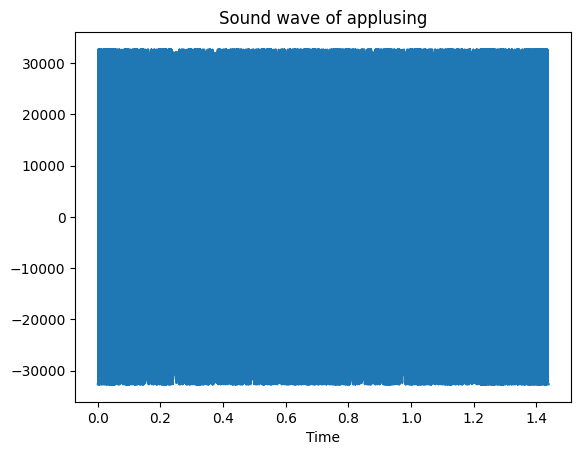

In [ ]:
#using matplotlib to plot
#creating a new figure
plt.figure(1)
plt.title("Sound wave of applusing")
plt.xlabel("Time")
plt.plot(time,signal)
plt.show()

#Extracting waves

In [ ]:
import wave

# times between which to extract the wave from (feel free to change how ever make sure it's in the range of the audio file )
start = 0.02 # seconds
end = 1.0 # seconds

# file to extract the snippet from
with wave.open('applause_y.wav', "rb") as infile:
    # get file data
    nchannels = infile.getnchannels()
    sampwidth = infile.getsampwidth()
    framerate = infile.getframerate()
    # set position in wave to start of segment
    infile.setpos(int(start * framerate))
    # extract data
    data = infile.readframes(int((end - start) * framerate))

# write the extracted data to a new file
with wave.open('newSound.wav', 'w') as outfile:
    outfile.setnchannels(nchannels)
    outfile.setsampwidth(sampwidth)
    outfile.setframerate(framerate)
    outfile.setnframes(int(len(data) / sampwidth))
    outfile.writeframes(data)